## Sales Forcasting Project


#### Objective:
Perform EDA and Predict the sales of the next 7 days from the last date of the Training dataset.

#### Dataset:
Superstore Sales Dataset from https://www.kaggle.com/rohitsahoo/sales-forecasting

### Loading Phase

In [133]:
# Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# load in dataset

url = '~/Documents/GitHub/Sales_Prediction/train.csv'

data = pd.read_csv(url)

data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Exploratory Data Analysis

In [135]:
# summarize dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [136]:
# remove Row ID

data.drop('Row ID', axis = 1, inplace = True)

In [137]:
# convert dates to datetime

data['Order Date'] = pd.to_datetime(data['Order Date'], format = '%d/%m/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format = '%d/%m/%Y')

print(data['Order Date'].dtypes, data['Ship Date'].dtypes)

datetime64[ns] datetime64[ns]


In [138]:
# drop NA in postal codes and convert to integer

data = data.dropna()

data['Postal Code'] = data['Postal Code'].astype('int64')

In [139]:
data['Postal Code'].dtype

dtype('int64')

In [140]:
# add in new features from dates

data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day
data['Order Week_day'] = data['Order Date'].dt.weekday

data['Ship Year'] = data['Ship Date'].dt.year
data['Ship Month'] = data['Ship Date'].dt.month
data['Ship Day'] = data['Ship Date'].dt.day
data['Ship Week_day'] = data['Ship Date'].dt.weekday

data['Ship Delay'] = pd.Series(delta.days for delta in (data['Ship Date'] - data['Order Date']))

In [141]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sales,Order Year,Order Month,Order Day,Order Week_day,Ship Year,Ship Month,Ship Day,Ship Week_day,Ship Delay
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,261.9600,2017,11,8,2,2017,11,11,5,3.0
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,731.9400,2017,11,8,2,2017,11,11,5,3.0
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,14.6200,2017,6,12,0,2017,6,16,4,4.0
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,957.5775,2016,10,11,1,2016,10,18,1,7.0
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,22.3680,2016,10,11,1,2016,10,18,1,7.0


In [142]:
# exploration function
def explore(df):
    print("Shape: ", df.shape, "/n")
    print(df.dtypes, "/n")
    print(df.head(), "/n")
    # numeric data statistics
    print(df.describe())
    df.hist(figsize=(14,14), xrot=45)
    plt.show()
    # categorical data statistics
    print(df.describe(include = 'object'))
    for column in df.select_dtypes(include = 'object'):
        if df[column].nunique() < 10:
            sns.countplot(y = column, data = df).figure.savefig('plots/{}_dist.png'.format(column))
            plt.show()

Shape:  (9789, 26) /n
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country                   object
City                      object
State                     object
Postal Code                int64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Order Year                 int64
Order Month                int64
Order Day                  int64
Order Week_day             int64
Ship Year                  int64
Ship Month                 int64
Ship Day                   int64
Ship Week_day              int64
Ship Delay               float64
dtype: object /n
         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2017-152156 2017-11-08 201

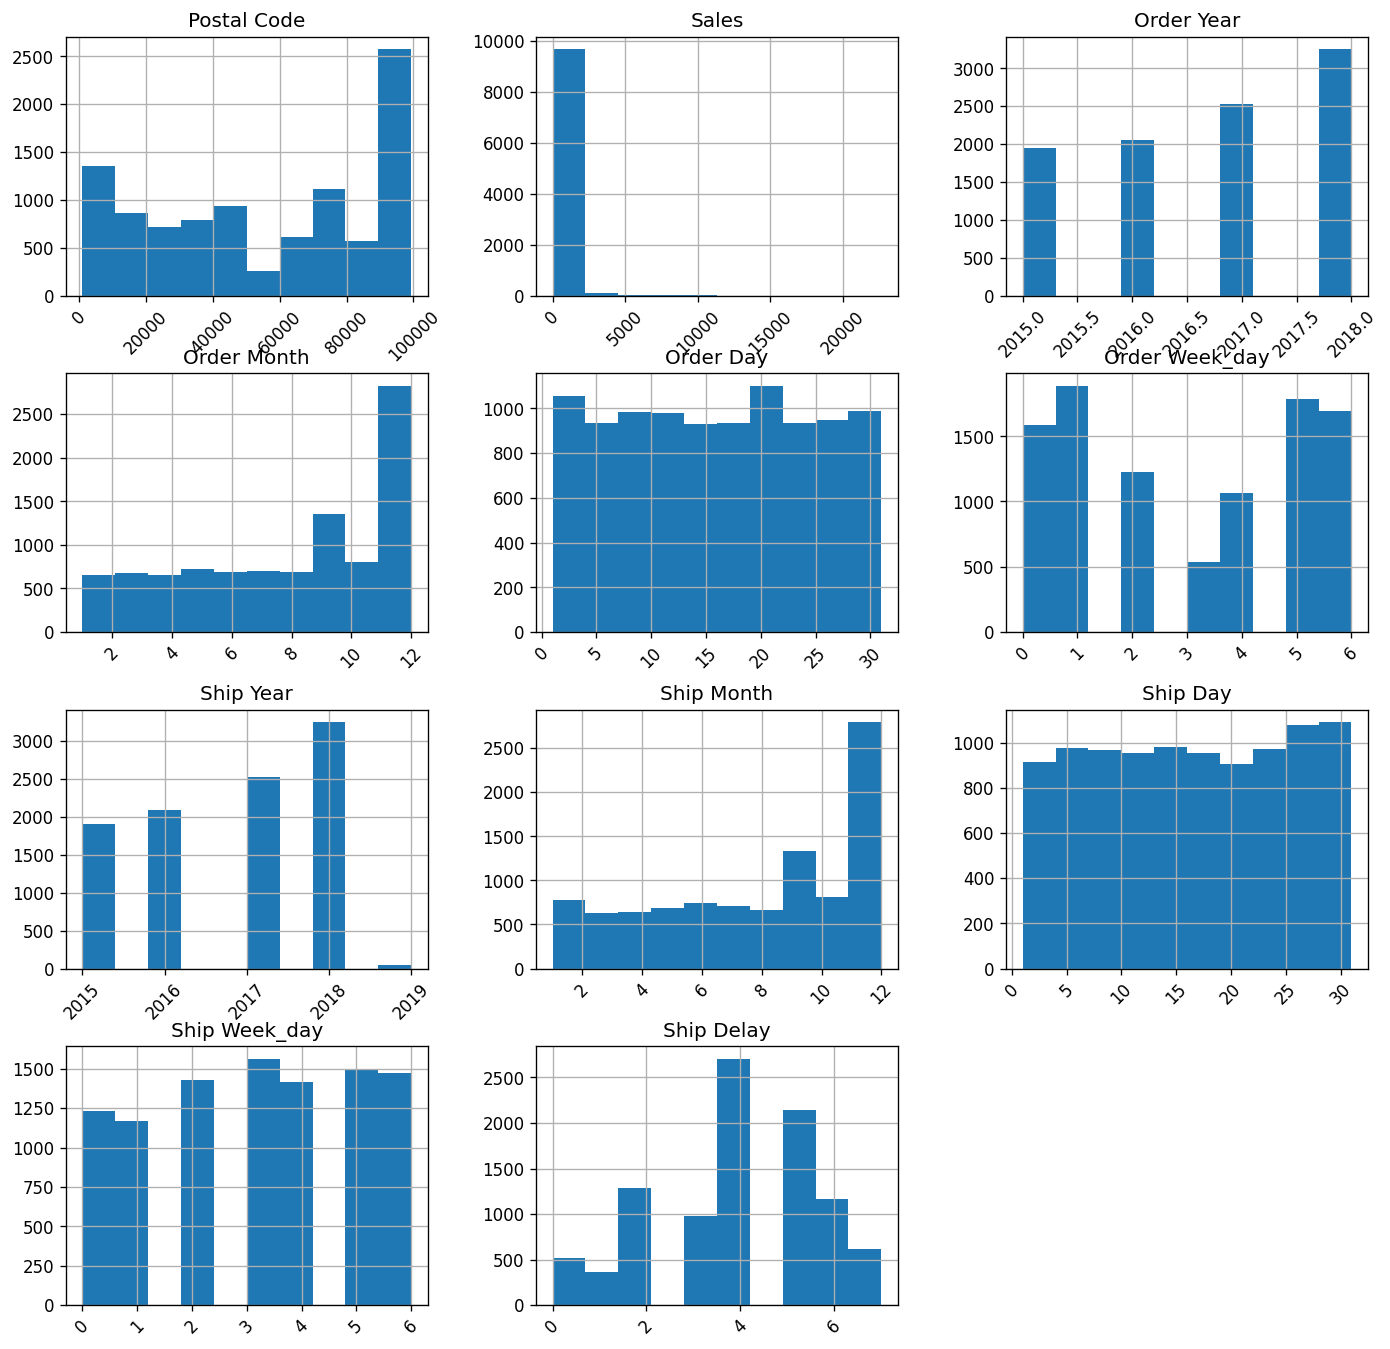

              Order ID       Ship Mode Customer ID  Customer Name   Segment  \
count             9789            9789        9789           9789      9789   
unique            4916               4         793            793         3   
top     CA-2018-100111  Standard Class    WB-21850  William Brown  Consumer   
freq                14            5849          35             35      5096   

              Country           City       State Region       Product ID  \
count            9789           9789        9789   9789             9789   
unique              1            529          48      4             1860   
top     United States  New York City  California   West  TEC-AC-10003832   
freq             9789            891        1946   3140               18   

               Category Sub-Category     Product Name  
count              9789         9789             9789  
unique                3           17             1848  
top     Office Supplies      Binders  Staple envelope  

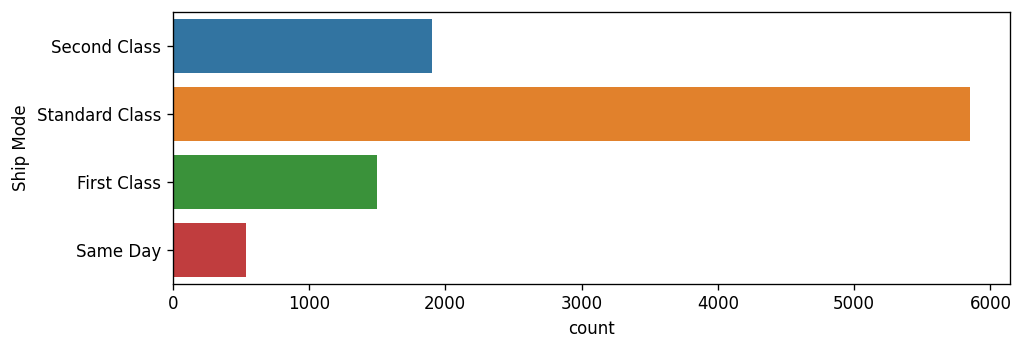

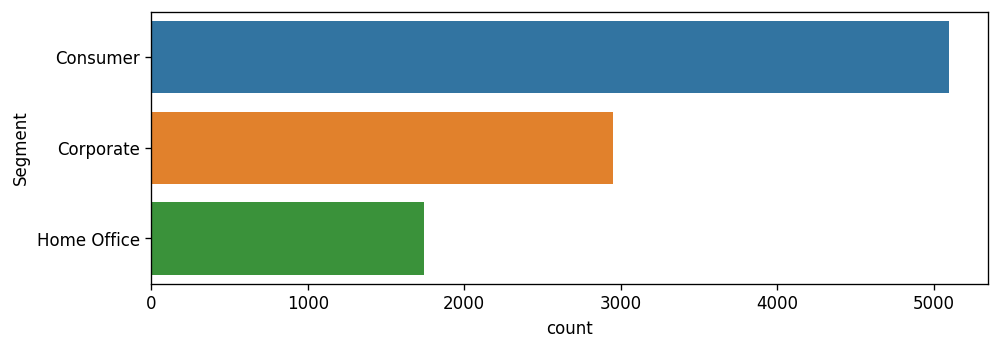

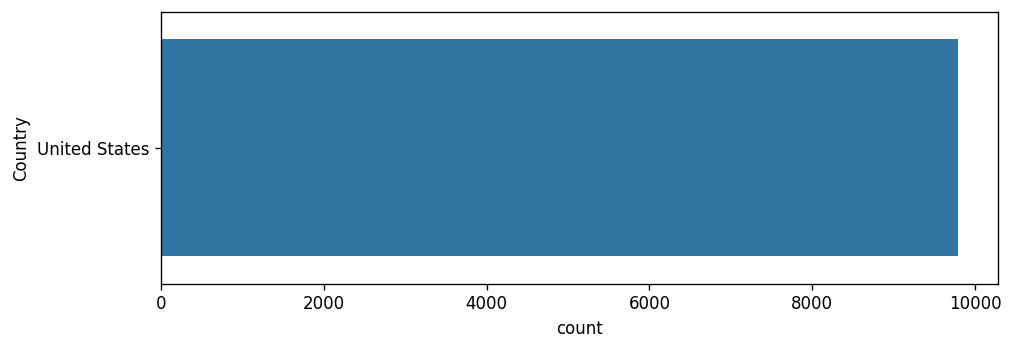

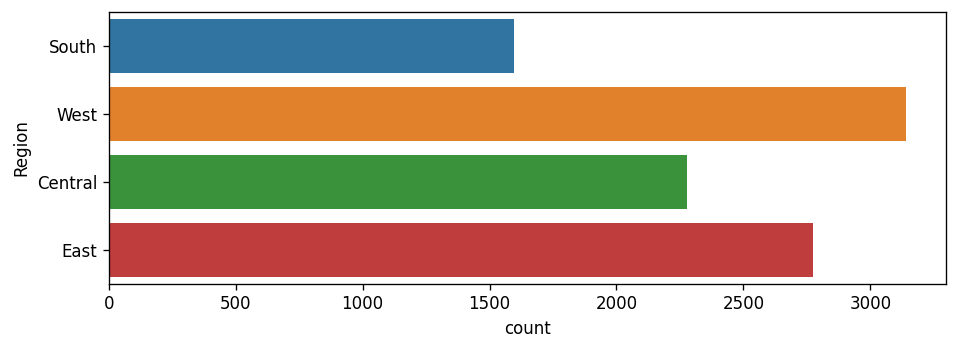

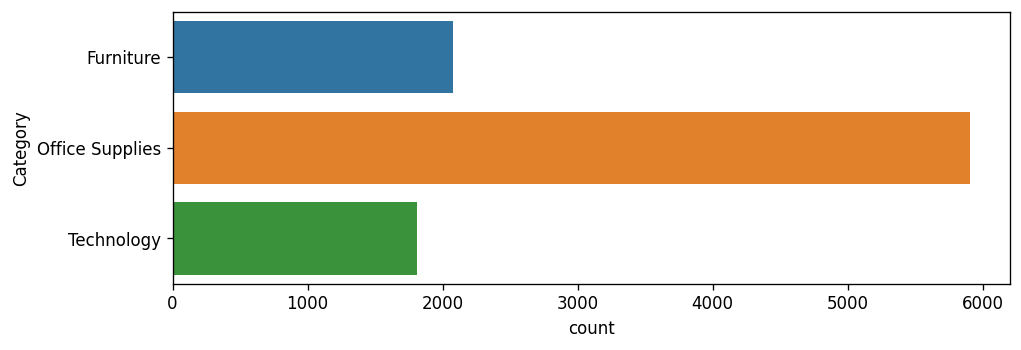

In [143]:
explore(data)

In [144]:
# create a dictionay for counting each occurance of delay
delay = {}

for x in data['Ship Delay']:
    if x in delay:
        delay[x] += 1
    else:
        delay[x] = 1       
        
print('Ship Delay Counts:')

for key in sorted(delay): # sorts keys for delay dictionary
    if key <= data['Ship Delay'].max(): # eliminates printing nan values 
        print(key, ': ', delay[key])

Ship Delay Counts:
0.0 :  514
1.0 :  362
2.0 :  1291
3.0 :  975
4.0 :  2708
5.0 :  2144
6.0 :  1169
7.0 :  615


In [145]:
# apply counter column to data and groupby
data['COUNTER'] = 1
group_data = data.groupby(['Ship Delay', 'Ship Mode'])['COUNTER'].sum().reset_index()

print(group_data)

    Ship Delay       Ship Mode  COUNTER
0          0.0     First Class       41
1          0.0        Same Day      265
2          0.0    Second Class       50
3          0.0  Standard Class      158
4          1.0     First Class      193
5          1.0        Same Day       19
6          1.0    Second Class       24
7          1.0  Standard Class      126
8          2.0     First Class      367
9          2.0        Same Day       45
10         2.0    Second Class      482
11         2.0  Standard Class      397
12         3.0     First Class      358
13         3.0        Same Day       25
14         3.0    Second Class      282
15         3.0  Standard Class      310
16         4.0     First Class      240
17         4.0        Same Day       72
18         4.0    Second Class      453
19         4.0  Standard Class     1943
20         5.0     First Class      191
21         5.0        Same Day       53
22         5.0    Second Class      420
23         5.0  Standard Class     1480


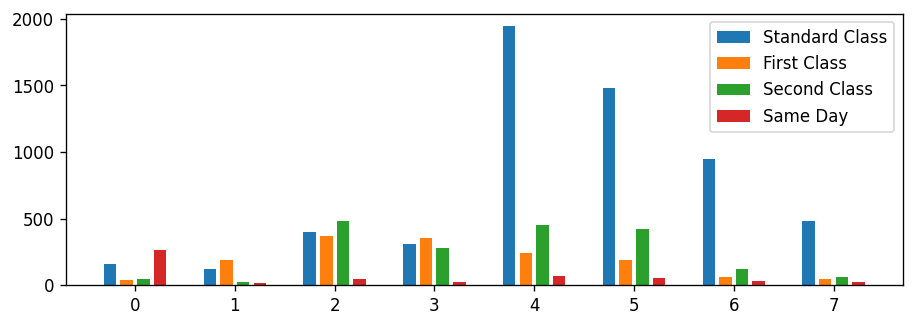

In [146]:
# create bar chart of shipping delay counts grouped by shipping method
fig, ax = plt.subplots()

ax.bar(x = group_data[group_data['Ship Mode'] == 'Standard Class']['Ship Delay'] - 1/4, height = group_data[group_data['Ship Mode'] == 'Standard Class']['COUNTER'], width = 1/8, label = 'Standard Class')
ax.bar(x = group_data[group_data['Ship Mode'] == 'First Class']['Ship Delay'] - 1/12, height = group_data[group_data['Ship Mode'] == 'First Class']['COUNTER'], width = 1/8, label = 'First Class')
ax.bar(x = group_data[group_data['Ship Mode'] == 'Second Class']['Ship Delay'] + 1/12, height = group_data[group_data['Ship Mode'] == 'Second Class']['COUNTER'], width = 1/8, label = 'Second Class')
ax.bar(x = group_data[group_data['Ship Mode'] == 'Same Day']['Ship Delay'] + 1/4, height = group_data[group_data['Ship Mode'] == 'Same Day']['COUNTER'], width = 1/8, label = 'Same Day')

plt.legend()
plt.show()

In [147]:
# remove customer ID and name from data
data = data.drop(columns = ['Customer ID', 'Customer Name'])

In [148]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Order Year',
       'Order Month', 'Order Day', 'Order Week_day', 'Ship Year', 'Ship Month',
       'Ship Day', 'Ship Week_day', 'Ship Delay', 'COUNTER'],
      dtype='object')

In [149]:
data['Country'].unique()

array(['United States'], dtype=object)

Since everything is listed within the United States, we can reduce features to zipcode only to identify locations

In [150]:
data = data.drop(columns = ['Country', 'City', 'State', 'COUNTER'])

data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month', 'Order Day',
       'Order Week_day', 'Ship Year', 'Ship Month', 'Ship Day',
       'Ship Week_day', 'Ship Delay'],
      dtype='object')

#### Plot sales over time

In [151]:
# groupby order date and sum sales
sales_data = data.groupby('Order Date')['Sales'].sum().reset_index()

sales_data.head()

,Order Date,Sales
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


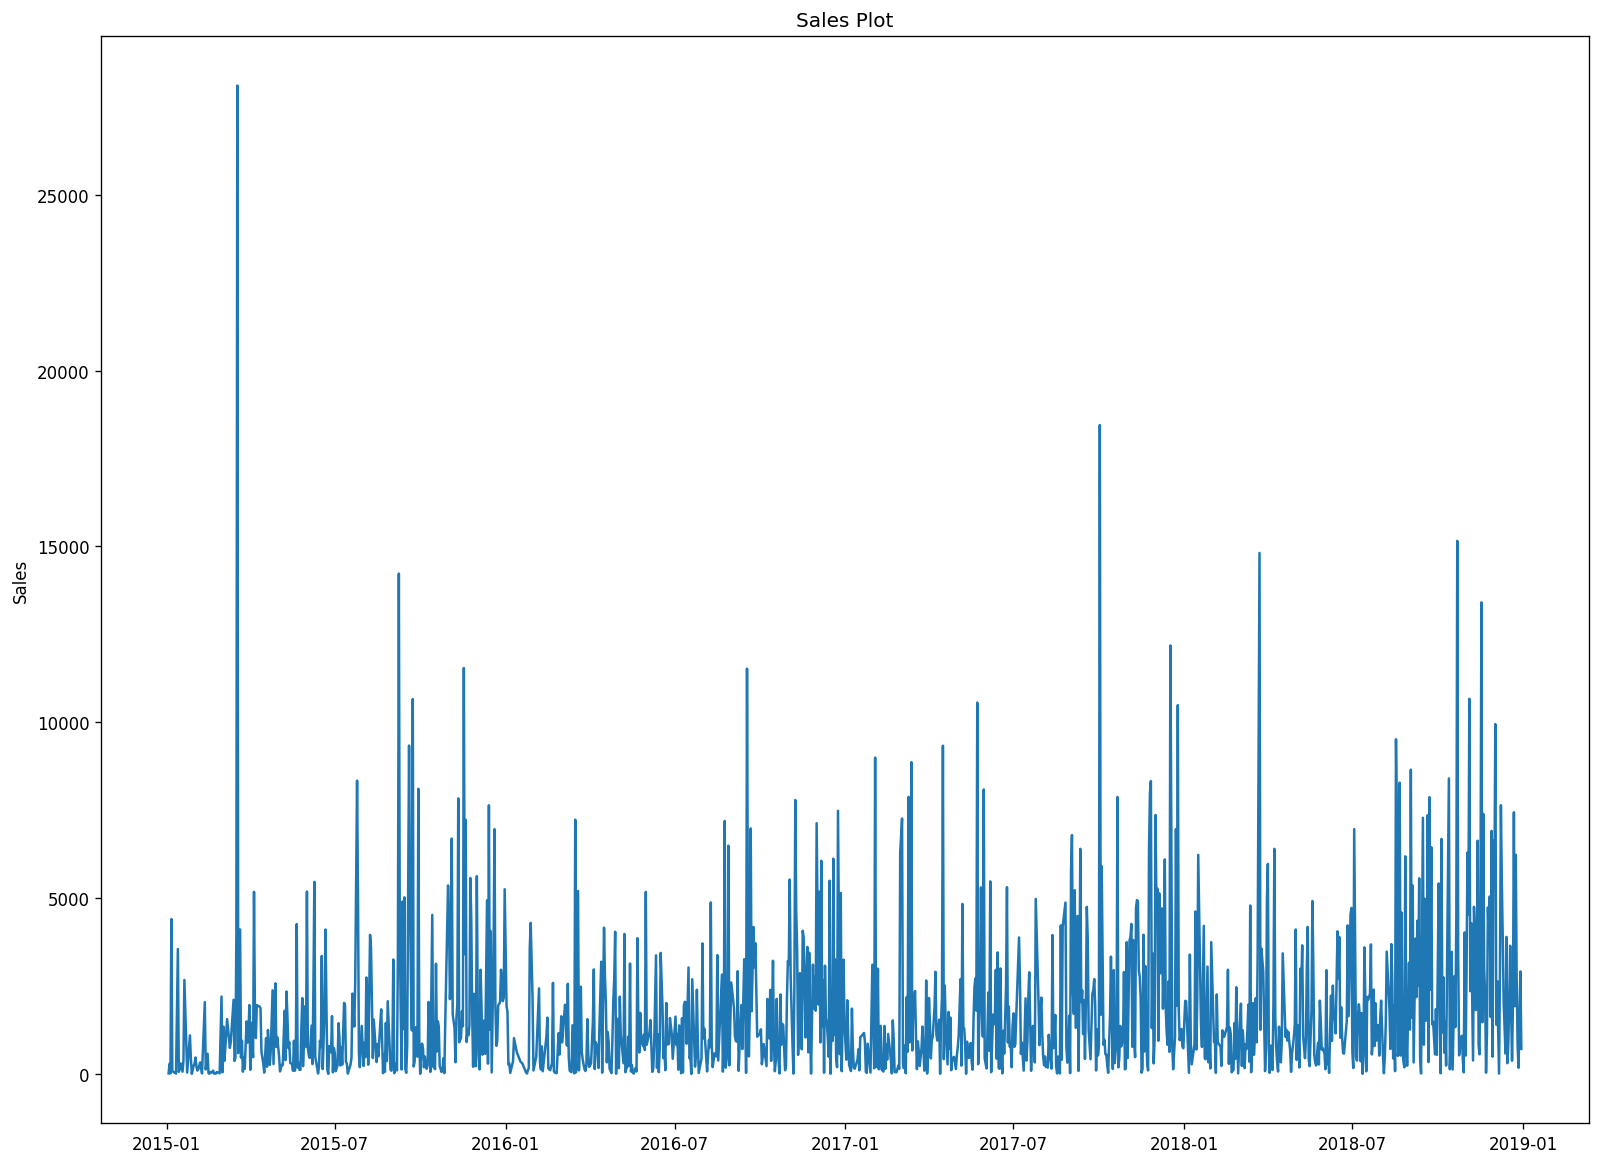

In [152]:
# plot sales data

fig, ax = plt.subplots(figsize = (16,12))

ax.plot(sales_data['Order Date'], sales_data['Sales'])
ax.set_title('Sales Plot')
ax.set(ylabel = 'Sales')
fig.savefig("plots/sales.png")

#### Look for seasonal trends

In [153]:
import matplotlib as mpl

# prepare data
sales_data['year'] = [d.year for d in sales_data['Order Date']]
sales_data['month'] = [d.strftime('%b') for d in sales_data['Order Date']]
sales_data['month'] = pd.Categorical(sales_data['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])



# remove order date
sales = sales_data.drop(columns = ['Order Date'])

# group sales_data by month and year to identify trends
sales = sales.groupby(['month', 'year'])['Sales'].sum().reset_index()

years = sales['year'].unique()

# colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace = False)

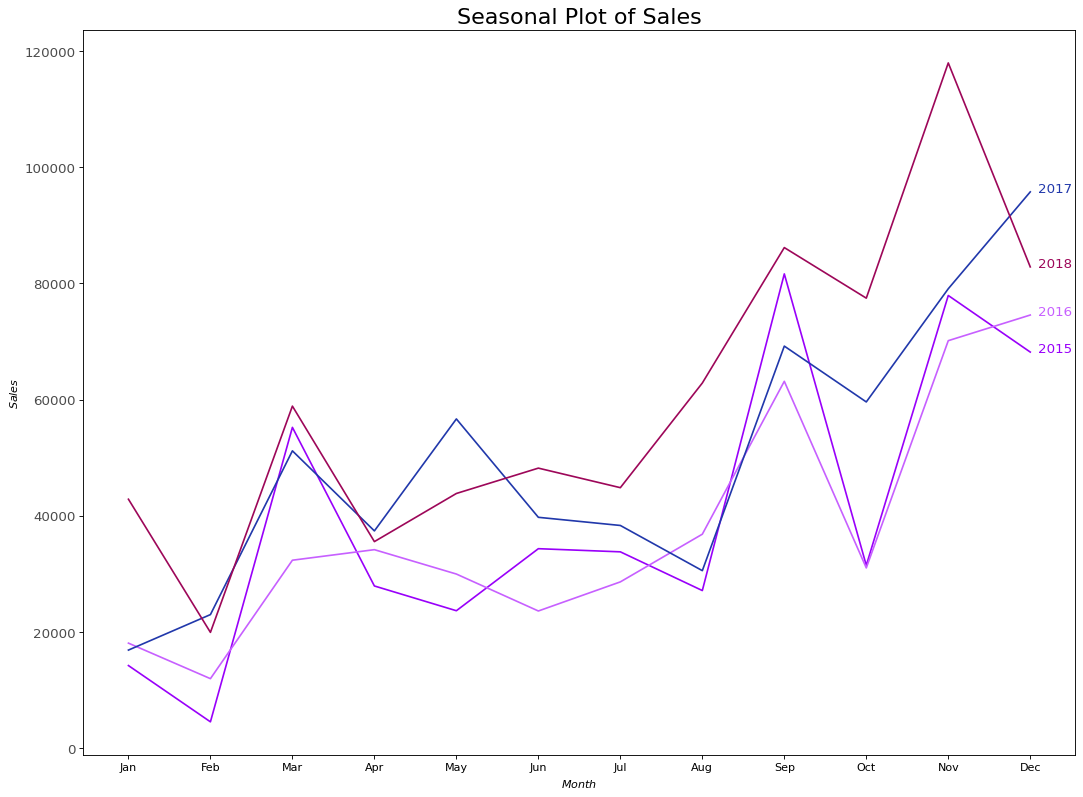

In [154]:
# seasonal plot
plt.figure(figsize = (16, 12), dpi = 80)
for i, y in enumerate(years):      
        plt.plot('month', 'Sales', data = sales.loc[sales.year == y, :], color = mycolors[i], label = y,)
        plt.text(sales.loc[sales.year == y, :].shape[0]-.9, sales.loc[sales.year == y , 'Sales'][-1:].values[0], y, fontsize = 12, color = mycolors[i])

# Decoration
plt.gca().set(ylabel = '$Sales$', xlabel = '$Month$')
plt.yticks(fontsize = 12, alpha = .7)
plt.title("Seasonal Plot of Sales", fontsize = 20)
plt.savefig("plots/seasons.png")

#### Identifying general trend and seasonality with box plots

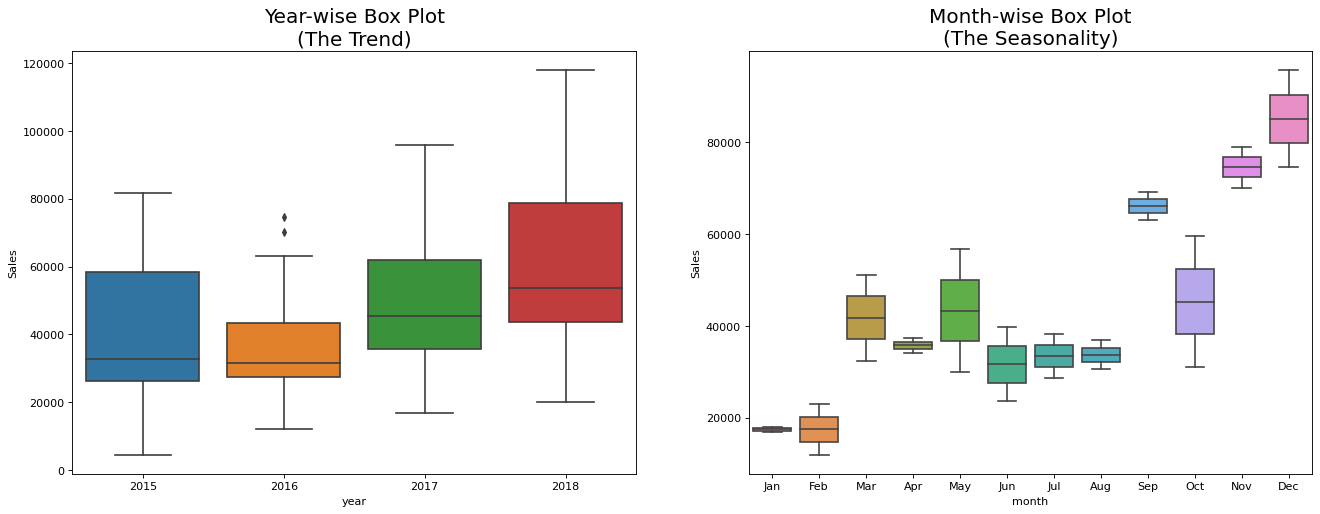

In [155]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize = (20,7), dpi= 80)
sns.boxplot(x = 'year', y = 'Sales', data = sales, ax = axes[0])
sns.boxplot(x = 'month', y = 'Sales', data = sales.loc[~sales.year.isin([2015, 2018]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 18)
plt.savefig("plots/trend_seasons.png")

#### Classical decomposition of series

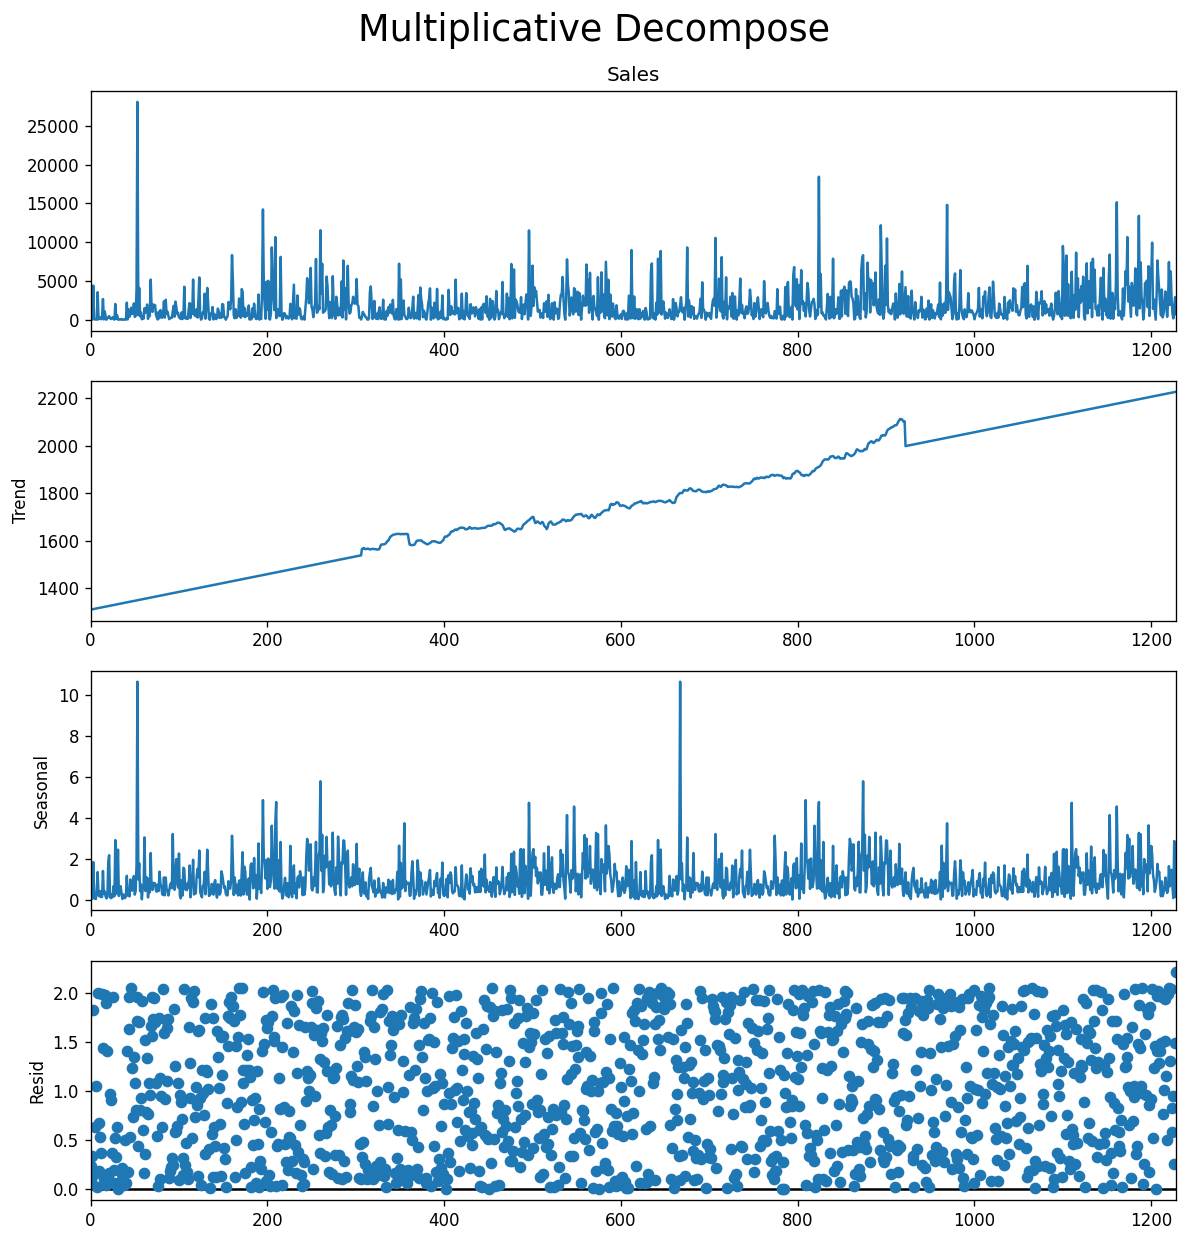

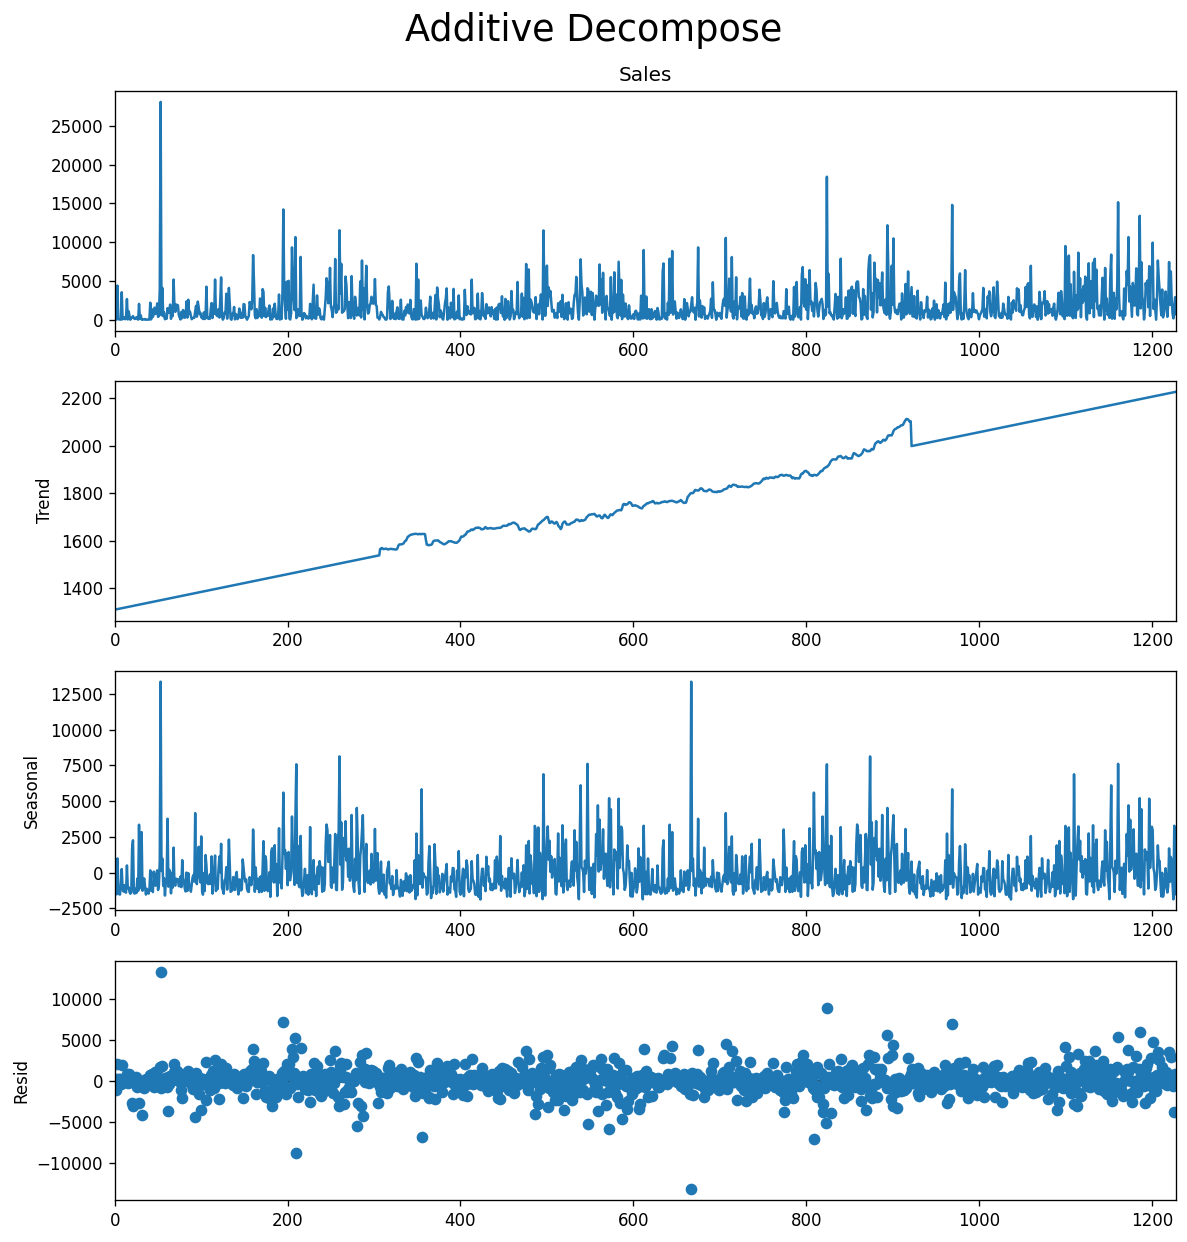

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(sales_data['Sales'], model = 'multiplicative', extrapolate_trend = 'freq', period = int(len(sales_data)/2))

# Additive Decomposition
result_add = seasonal_decompose(sales_data['Sales'], model = 'additive', extrapolate_trend = 'freq', period = int(len(sales_data)/2))

# Plot
plt.rcParams.update({'figure.figsize': (10, 10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize = 22, y = 1.03)
result_add.plot().suptitle('Additive Decompose', fontsize = 22, y = 1.03)
plt.savefig("plots/decomp.png")

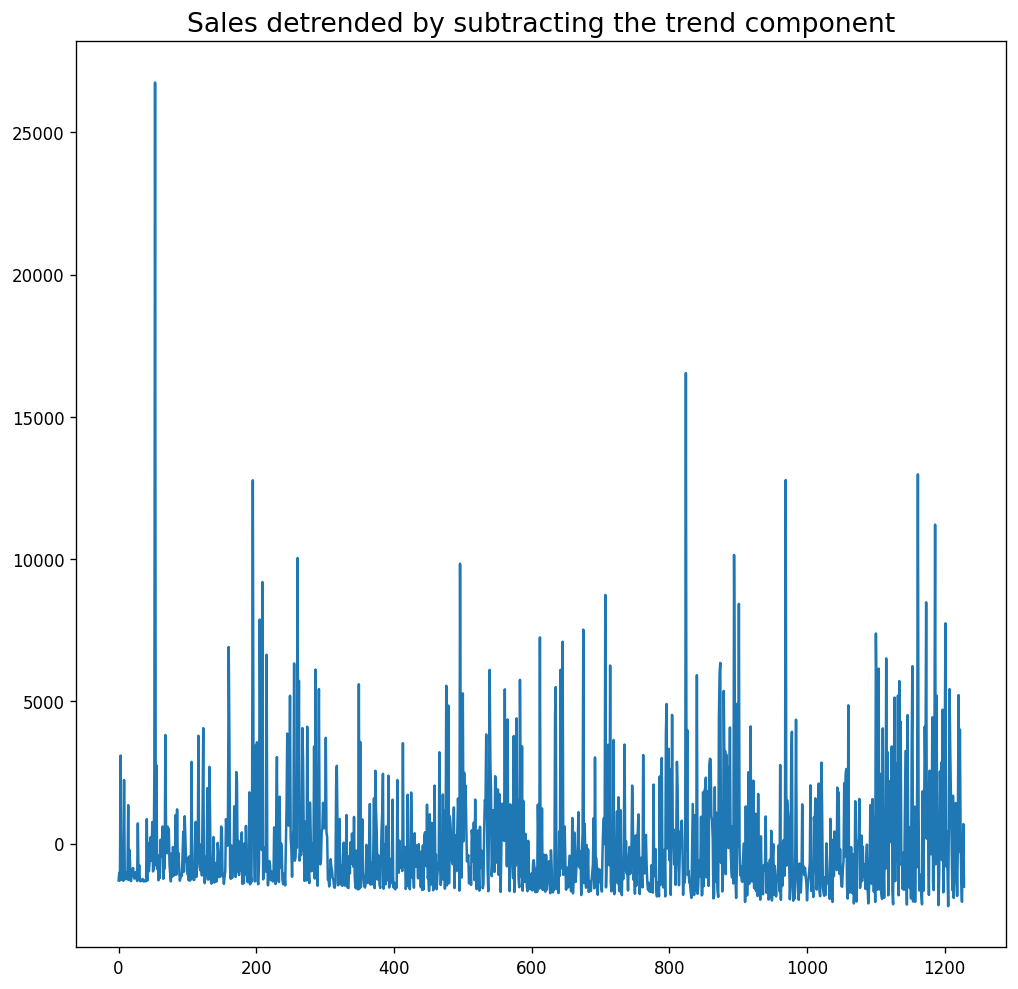

In [157]:
detrended = sales_data.Sales.values - result_add.trend
plt.plot(detrended)
plt.title('Sales detrended by subtracting the trend component', fontsize = 16)
plt.savefig("plots/detrended.png")

#### Testing for stationary series

In [158]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
result = adfuller(sales_data.Sales.values, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.712554167940101
p-value: 7.243309858005893e-07
Critial Values:
   1%, -3.4357480073434905
Critial Values:
   5%, -2.863923702481129
Critial Values:
   10%, -2.568039121778048


p-value is less than 0.05 and therfore the null hypothesis that series is non-stationary is rejected. 

#### Split data into train and test sets

In [159]:
import math

train_data = sales_data[:math.ceil(0.75 * len(sales_data))]

test_data = sales_data[math.ceil(0.75 * len(sales_data)):]

In [160]:
print("75% sales_data: ", math.ceil(0.75 * len(sales_data)))
print("train_data: ", len(train_data))
print("25% sales_data: ", math.floor(0.25 * len(sales_data)))
print("test_data: ", len(test_data))

75% sales_data:  922
train_data:  922
25% sales_data:  307
test_data:  307


#### Baseline using last value to predict next

In [161]:
# determine MSE of baseline model using Naive Method

summation = 0
n = len(test_data)
for i in range (0, n):
    if i == 0:
        diff = test_data['Sales'].iloc[i] - train_data['Sales'].iloc[-1]
        squared_difference = diff**2
        summation = summation + squared_difference
    else:
        diff = test_data['Sales'].iloc[i] - test_data['Sales'].iloc[i-1]
        squared_difference = diff**2
        summation = summation + squared_difference
MSE = summation/n
print("The Mean Square Error for the Baseline Model is: " , MSE)
print("The Mean Error for the Baseline Model is: " , np.sqrt(MSE))

The Mean Square Error for the Baseline Model is:  10683301.207483001
The Mean Error for the Baseline Model is:  3268.531965192172


#### Build ARIMA model

In [162]:
sales_data = sales_data.drop(columns = ['year', 'month'])

sales_data.head()

,Order Date,Sales
0,2015-01-03,16.448
1,2015-01-04,288.060
2,2015-01-05,19.536
3,2015-01-06,4407.100
4,2015-01-07,87.158


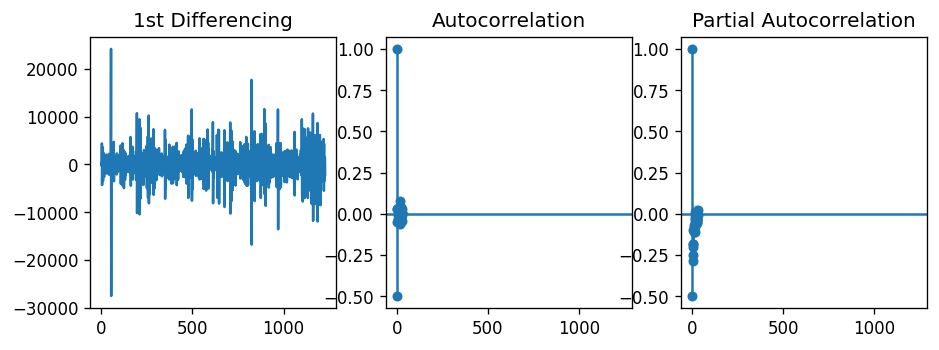

In [163]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize': (9,3), 'figure.dpi': 120})

fig, axes = plt.subplots(1, 3, sharex = True)
axes[0].plot(sales_data.Sales.diff()); axes[0].set_title('1st Differencing')
plot_acf(sales_data.Sales.diff().dropna(), ax = axes[1])
plot_pacf(sales_data.Sales.diff().dropna(), ax = axes[2])

plt.savefig('plots/acf_pacf.png')

In [164]:
sales_data = sales_data.set_index('Order Date')

In [165]:
sales_data.index = pd.DatetimeIndex(sales_data.index).to_period('D')

sales_data = sales_data.squeeze()

print(type(sales_data))

sales_data.head()

<class 'pandas.core.series.Series'>


Order Date
2015-01-03      16.448
2015-01-04     288.060
2015-01-05      19.536
2015-01-06    4407.100
2015-01-07      87.158
Freq: D, Name: Sales, dtype: float64

In [166]:
train_data = train_data.drop(columns = ['year', 'month'])
train_data = train_data.set_index('Order Date').to_period('D').squeeze()

test_data = test_data.drop(columns = ['year', 'month'])
test_data = test_data.set_index('Order Date').to_period('D').squeeze()

In [167]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults

model = ARIMA(train_data, order = (5, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  922
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -8397.249
Date:                Tue, 25 May 2021   AIC                          16812.499
Time:                        21:17:03   BIC                          16855.937
Sample:                    01-03-2015   HQIC                         16829.073
                         - 01-21-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1692.8989    220.768      7.668      0.000    1260.201    2125.597
ar.L1          0.1462      1.174      0.125      0.901      -2.154       2.446
ar.L2          0.7947      1.150      0.691      0.4

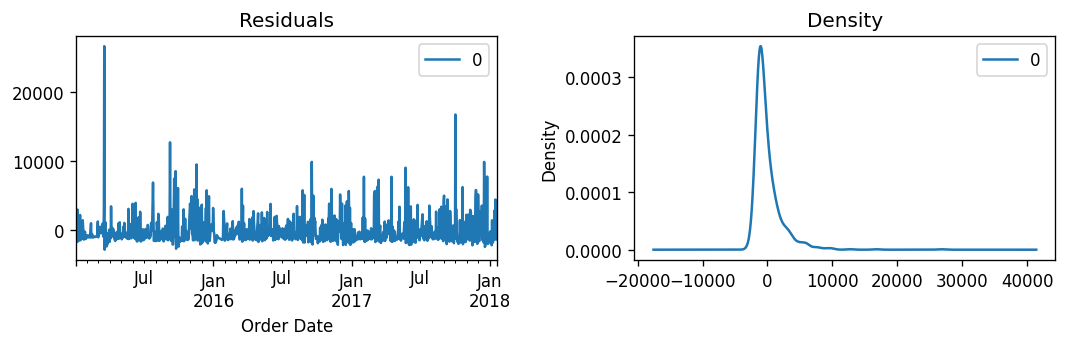

In [168]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2)
residuals.plot(title = "Residuals", ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.tight_layout()
plt.savefig("plots/residual_errors.png")

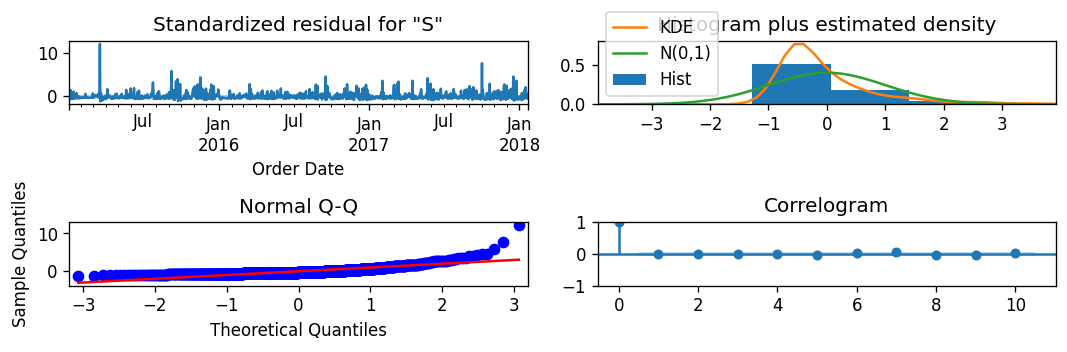

In [169]:
# Actual vs Fitted
model_fit.plot_diagnostics()
plt.tight_layout()
plt.savefig("plots/model_diagnostics.png")

#### Predictions

In [170]:
warnings.filterwarnings("ignore", category=FutureWarning)

model_2 = ARIMA(train_data, order = (5, 0, 2))
fitted = model_2.fit()  

# Forecast
fc = fitted.forecast()

In [171]:
print(fc)

2017-07-13    1993.767287
Freq: D, dtype: float64


In [172]:
pred = fitted.forecast(steps = 307)

In [173]:
# determine MSE of ARIMA model

summation = 0
n = len(test_data)
for i in range (0, n):
    diff = test_data.iloc[i] - pred[i]
    squared_difference = diff**2
    summation = summation + squared_difference
MSE = summation/n
print("The Mean Square Error for the Baseline Model is: " , MSE)
print("The Mean Error for the Baseline Model is: " , np.sqrt(MSE))

The Mean Square Error for the Baseline Model is:  6187505.5137038315
The Mean Error for the Baseline Model is:  2487.4697010624736


The ARIMA model is better than baseline

In [174]:
pred_7 = fitted.forecast(steps = 314) # 307 points in test data plus the next 7 outside the data.

print(pred_7[307:])

2018-05-16    1692.898967
2018-05-17    1692.898965
2018-05-18    1692.898963
2018-05-19    1692.898961
2018-05-20    1692.898959
2018-05-21    1692.898958
2018-05-22    1692.898956
Freq: D, Name: predicted_mean, dtype: float64


In [175]:
print('Training data average: ', train_data.mean())

Training data average:  1692.8989528199565


What is happening here is the ARIMA model is using thhe average of the training data to predict the next 7 days past our test data. lets see what a baseline looks like just for the training data.